# Trial Report

Pears plantation, Spain, 2019-2022

Analysis by Andre Moreira (2023-24)

***

## Introduction

Trial in Spain, following the tree development in a pear orchard. Some trees were treated with a special new product, others treated with a common product ("control").

The orchard was planted in 2019, we measured the tree trunks in 2022, using it as an accepted proxy for tree development and health.

| | |
|-|-|
| Campaign | 2019-2023 |
| Crop | Pears |
| Variety | Ercolini (ER), Carmen (CA), Limonera (LI) |
| Planting date | March 2019 |
| Trunk measurements date | Fall 2022 |
| Total area | 9 ha |
| Number of trees measured | 936 |
| -|- |
| Treatment | Application rate |
| New product | 2 ton/ha |
| Control | 2 ton/ha |

<table style="margin-left: 0; margin-right: auto;">
    <tr>
        <td style="text-align: center; vertical-align: middle;" > Trunk measurement </td>
        <td style="text-align: center; vertical-align: middle;"> Orchard map </td>
    </tr>    
    <tr>
        <td> <img src="Example_measurement.jpg" width="450" /> </td>
        <td> <img src="Orchard_map.jpg" width="300" /> </td>
    </tr>
</table>


**The results below will show that the variety Ercolini (ER) reacts strongly to the treatment. The varieties Carmen (CA) and Limonera (LI) show a weak reaction to the new product.**

## Preamble

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')  # optional: for ggplot-like style

import scipy
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel

%matplotlib inline

import seaborn as sns

import os

In [3]:
%%html
<style> table {float:left} </style>

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
# Change Pandas way of displaying DFs as wished
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# Set a color scheme for SNS in this NB

pal = 'icefire'
#pal = 'hot'
#pal = 'nipy_spectral'

sns.set_palette(pal)
sns.color_palette(pal)

[(0.33355526, 0.64107876, 0.80445484),
 (0.28708711, 0.32912157, 0.69034504),
 (0.15652427, 0.15348248, 0.22238175),
 (0.22994394, 0.13076731, 0.15146314),
 (0.61319563, 0.1824336, 0.2687872),
 (0.91463791, 0.43668557, 0.21367954)]

### Upload and clean the data, if needed

In [8]:
# Read the CSV file with the data
PATH = '/home/memology/Documents/Python_and_Data_projects/Portfolio_Ag/Pear_Spain_2019-2022/'
filename = PATH + 'Trunk_perimeter_Data_2022.csv'

df_raw = pd.read_csv(filename)

In [9]:
df_raw.head()

,Area,Tree line number,Variety,Plot,Treatment,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,D,39,ER,N2,N,12.40,12.60,15.00,10.80,13.00,14.70,16.00,14.30,13.40,14.30,17.50,12.20,12.00,15.20,13.10,13.00,13.80,12.80,15.20,15.70,12.10,11.00,11.20,15.00,13.40,8.40,15.00
1,D,40,ER,N1,N,11.00,11.20,11.30,13.40,14.10,13.40,15.60,13.00,15.40,14.30,14.40,12.20,13.30,14.00,11.80,9.00,13.90,15.50,9.00,15.20,12.40,15.70,14.00,11.20,15.50,11.40,13.20
2,D,43,ER,T2,T,9.80,9.70,11.20,10.40,9.90,12.60,9.80,9.70,13.30,11.50,13.60,11.00,11.40,11.40,11.20,16.20,13.60,10.90,11.50,10.10,11.00,12.00,13.50,12.20,12.60,12.70,10.30
3,D,44,ER,T1,T,10.10,12.80,10.30,10.10,9.20,11.50,11.30,11.10,17.50,11.80,14.50,9.00,14.50,10.40,15.50,11.90,10.00,14.50,11.50,9.80,10.20,13.60,11.60,9.40,11.80,10.70,12.80
4,D,49,LI,T6,T,9.60,9.60,9.00,7.20,9.40,9.30,8.20,9.20,8.10,8.70,8.50,9.50,9.00,9.80,8.10,7.90,9.70,10.40,8.60,7.10,8.80,8.50,8.60,8.50,6.80,6.90,7.80


In [10]:
# The way the dataframe is organized is a bit more difficult to work with than if we have individual
# trees in a modified dataframe. Let us change this.

df = df_raw.melt(id_vars=["Area", "Tree line number", "Variety", "Plot", "Treatment"], 
        var_name="Tree ID", 
        value_name="Diameter")

In [11]:
df.shape

(972, 7)

In [12]:
# Now each tree has its value, individually
df.head()

,Area,Tree line number,Variety,Plot,Treatment,Tree ID,Diameter
0,D,39,ER,N2,N,1,12.40
1,D,40,ER,N1,N,1,11.00
2,D,43,ER,T2,T,1,9.80
3,D,44,ER,T1,T,1,10.10
4,D,49,LI,T6,T,1,9.60


In [13]:
# Let us check for NaN (meaning, values that were not measured because the tree line was shorter)
df.isna().sum()

Area                 0
Tree line number     0
Variety              0
Plot                 0
Treatment            0
Tree ID              0
Diameter            36
dtype: int64

In [14]:
# Easy to solve: just drop those rows containing NaNs!

df.dropna(axis = 0, how = 'any', inplace = True)

In [15]:
df.shape

(936, 7)

*Note that this means the trial had 936 individual tree measurements*

In [16]:
df.isna().sum()

Area                0
Tree line number    0
Variety             0
Plot                0
Treatment           0
Tree ID             0
Diameter            0
dtype: int64

No more NaNs in the dataframe, we can now proceed with our analysis

In [17]:
# To make the interpretation a bit easier, let us change the tags under 'Treatment'
new_tag = {'N':'New product', 'T':'Control'}
df.replace({'Treatment' : new_tag}, inplace = True)

In [18]:
df.head()

,Area,Tree line number,Variety,Plot,Treatment,Tree ID,Diameter
0,D,39,ER,N2,New product,1,12.40
1,D,40,ER,N1,New product,1,11.00
2,D,43,ER,T2,Control,1,9.80
3,D,44,ER,T1,Control,1,10.10
4,D,49,LI,T6,Control,1,9.60


## Analysis

### New product vs. control?

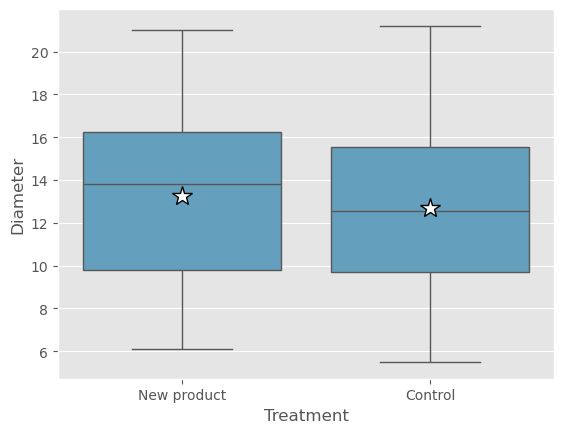

In [19]:
sns.boxplot(data = df, x = 'Treatment', y='Diameter', showfliers = True, showmeans=True,
           meanprops={"marker": "*", "markeredgecolor": "black", "markerfacecolor": "white", "markersize": "15"})
plt.show()

In [20]:
# Overall stats

aux_NP = df.query(f"`Treatment` == 'New product'")
l_NP = aux_NP['Diameter'].to_numpy(copy=True)

aux_control = df.query(f"`Treatment` == 'Control'")
l_control = aux_control['Diameter'].to_numpy(copy=True)

mean_NP = np.mean(l_NP)
mean_control = np.mean(l_control)
p_val_threshold = 0.05

# test for normal distributions and get the corresponding statistical test
if (len(l_NP) >= 8 and len(l_control) >= 8): # has to be 8 for the normaltest call 
    normal_NP = normaltest(l_NP).pvalue  # if less than 0.05 // threshold, it is NOT a normal function
    normal_control = normaltest(l_control).pvalue

    if (normal_NP <= p_val_threshold or normal_control <= p_val_threshold):
        # not a normal dist - use the Mann Whitney test for lists possibly with different lengths
        P_val = scipy.stats.mannwhitneyu(l_NP, l_control).pvalue
    else:
        P_val = ttest_ind(l_NP, l_control).pvalue

res = {'Variety':['All'],'New Product': [mean_NP], 'Control': [mean_control], 
       'Relative diff. (%)':[ '{:.2f}%'.format(((mean_NP/mean_control) - 1.0)*100)] ,'p value':[P_val]} 

pd.DataFrame(res)

,Variety,New Product,Control,Relative diff. (%),p value
0,All,13.24,12.67,4.49%,0.02


> Clearly the tree diameter in areas using the new product is higher than control, with statistical significance (p value < 0.05).
> 
> Are there differences within pear varieties?

### New product vs control - by variety

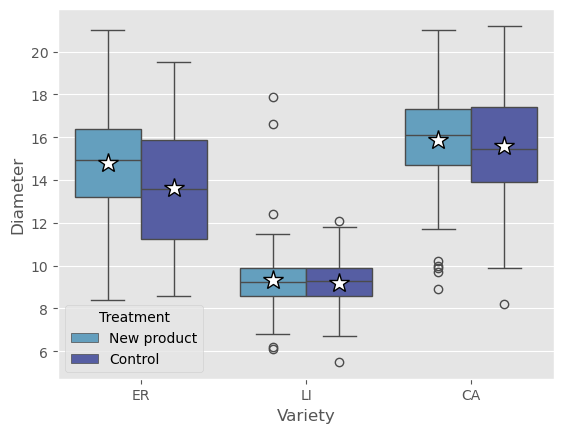

In [21]:
sns.boxplot(data = df, x = 'Variety', y='Diameter', hue = 'Treatment', showfliers = True, showmeans=True,
           meanprops={"marker": "*", "markeredgecolor": "black", "markerfacecolor": "white", "markersize": "15"})
plt.show()

> Visually, one can already say that some varieties react stronger to the new product ('ER') than others ('LI'). What does statistics tell us?

In [22]:
df['Variety'].unique()

array(['ER', 'LI', 'CA'], dtype=object)

In [23]:
# Prepare statistics by variety

vars = df['Variety'].unique()
variety_l = []
mean_NP_l = []
mean_control_l = []
diff_l = []
P_val_l = []

for variety in vars:
    aux_NP = df.query(f"`Treatment` == 'New product' and `Variety` == '{variety}'")
    l_NP = aux_NP['Diameter'].to_numpy(copy=True)
    
    aux_control = df.query(f"`Treatment` == 'Control' and `Variety` == '{variety}'")
    l_control = aux_control['Diameter'].to_numpy(copy=True)
    
    mean_NP = np.mean(l_NP)
    mean_control = np.mean(l_control)
    p_val_threshold = 0.05
    
    # test for normal distributions and get the corresponding statistical test
    if (len(l_NP) >= 8 and len(l_control) >= 8): # has to be 8 for the normaltest call 
        normal_NP = normaltest(l_NP).pvalue  # if less than 0.05 // threshold, it is NOT a normal function
        normal_control = normaltest(l_control).pvalue
    
        if (normal_NP <= p_val_threshold or normal_control <= p_val_threshold):
            # not a normal dist - use the Mann Whitney test for lists possibly with different lengths
            P_val = scipy.stats.mannwhitneyu(l_NP, l_control).pvalue
        else:
            P_val = ttest_ind(l_NP, l_control).pvalue
        variety_l = variety_l + [variety]
        mean_NP_l = mean_NP_l + [mean_NP]
        mean_control_l = mean_control_l + [mean_control]
        diff_l = diff_l +  ['{:.2f}%'.format(((mean_NP/mean_control) - 1.0)*100)]
        P_val_l = P_val_l + ['{:.5f}'.format(P_val)]

res = {'Variety':variety_l,'New Product': mean_NP_l, 'Control': mean_control_l, 
       'Relative diff. (%)': diff_l ,'p value':P_val_l} 

pd.DataFrame(res)

,Variety,New Product,Control,Relative diff. (%),p value
0,ER,14.82,13.61,8.90%,0.00015
1,LI,9.34,9.17,1.84%,0.54815
2,CA,15.87,15.57,1.90%,0.16890


> The statistical analysis confirms what the graphic already pointed out:
> - the variety 'ER' shows a strong and statistically significant different diameters between the treated plants and control - the treated plants were clearly stronger than control.
> - the other varieties show some small positive reaction, but only as a trend, as statistically the diameter of treated and control plants are not different.

### Looking into different dimensions

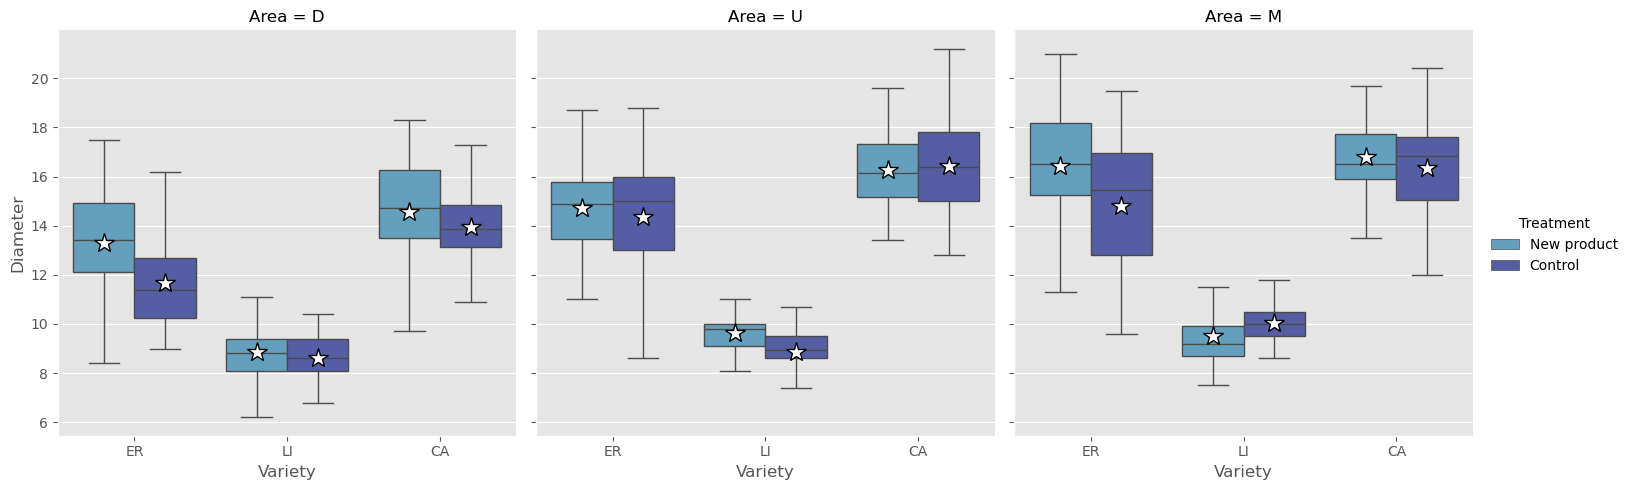

In [26]:
# Look at different trial areas

sns.catplot(data = df, y='Diameter', x='Variety', hue = 'Treatment', col = 'Area', 
            kind = 'box', showfliers = False, showmeans=True,
            meanprops={"marker": "*", "markeredgecolor": "black", "markerfacecolor": "white", "markersize": "15"})
plt.show()

Area 'D' is in the upper area of the trial, 'M' in the middle and 'U' in the lower terrain part.

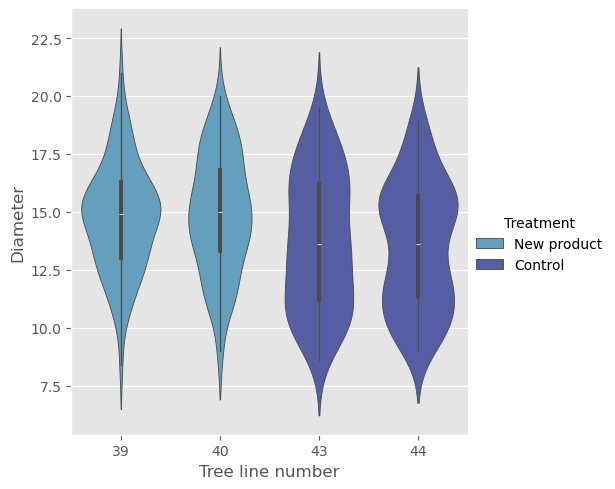

In [25]:
# We can look into each individual tree line for a given variety

variety = 'ER'
df_aux = df.query(f"`Variety` == '{variety}'")
sns.catplot(data = df_aux, y='Diameter', x = 'Tree line number' , hue = 'Treatment',
            kind="violin")
plt.show()